# SLU7 - Regression With Linear Regression: Exercise notebook

In this notebook you will practice the following:
     - Simple Linear Regression
     - Multiple Linear Regression
     - Closed Form Solution
     - Using scikit learn linear regression implementations
     - Gradient Descent


In [1]:
# Base imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

np.random.seed(42)

Let's imagine you just landed your first Data Science job in your dream company and you are super excited and wants everything to be perfect and you want to give 200% everyday and ...


![its-happening](assets/its-happening.gif)


Your are so excited for your first day.... and then you see your boss! He's walking in your direction... 

You start to feel the bad buterflies in your stomach and he now stands in front of you:


![got_a_job](assets/got_a_job2.gif)

## Exercise 1 - Simple Linear Regression

He wants to hire a manager with 5 years of experience so as a first task, he asked you:




<center><em>"What is the best salary I should offer to him?" </em></center>

He provides the company's data about the current salary distribution:

In [2]:
df_salary = pd.read_csv('data/salary_data.csv')
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Let's start by visualizing the data:

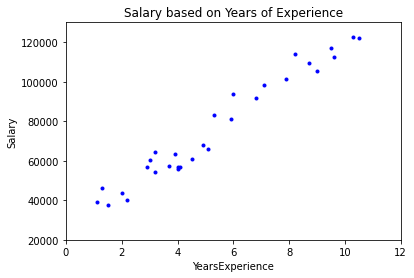

In [3]:
df_salary = df_salary.sort_values('YearsExperience')
plt.xlim((0, 12))
plt.ylim((20000, 130000))
plt.xlabel('YearsExperience')
plt.title('Salary based on Years of Experience')
plt.ylabel('Salary')
plt.plot(df_salary['YearsExperience'], df_salary['Salary'], 'b.')
plt.show()

To perform this task, you will need to use linear regression to solve this simple problem.

### Exercise 1.1 - Simple Linear Model

As you can see, our data has only one variable ($x$: 'Years of Experience') and one label ($y$: 'Salary'), so we can try to fit it with a simple linear regression. This model is represented by the following expression:

$$\hat{y} = \beta_0 + \beta_1 x$$

where $\hat{y}$ are the predictions, $\beta_0$ is the intercept, $\beta_1$ is the coefficient and $x$ is the input sample. Expanding to several samples, we can write this equation in a vector form:

$$\vec{\hat{y}} = \beta_0\vec{1} + \beta_1 \vec{x}$$

Implement the function <em>simple_linear_regression_model</em>:

In [ ]:
def simple_linear_regression_model(x, betas):
    """
    Args:
        x : numpy.array with shape (num_samples,) - The input data 
        betas: numpy.array with shape (2,) - The weights of the model [b_0, b_1]
    
    Returns:
        f1, f2 : numpy.array with shape (num_samples,) - intermediate calculations
        y_hat : list (lenght = (num_samples)) - The prediction made by 
                the simple linear regression.
    """
    
    # Let's begin with the first term of the equation
    # f1 = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Now, the second term
    # f2 = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Now let's put all together
    # y_hat = ...

    # YOUR CODE HERE
    raise NotImplementedError()
    
    return f1, f2, y_hat


Check if your solution is an approximate of the true solution for the following tests:

In [ ]:
# Simple test
f1_1, f2_1 ,y_hat1 = simple_linear_regression_model(np.arange(0, 5), np.array([-15, 20]))
expected_hash_1 = 'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d'
expected_hash_2 = 'b63d2b235e273730eda06df31b5d8c0f4c73eec62deb0a3937bc3540384d6a26'
expected_hash_3 = '981a391f15355b5d3f9fa774f7e5e2080b001ddf5e358b2b18c1066ce44dbd9e'
assert hashlib.sha256(str(len(f1_1)).encode('utf-8')).hexdigest() == expected_hash_1, "Perhaps your f1 variable is not well calculated!"
assert hashlib.sha256(str(f1_1[-1]).encode('utf-8')).hexdigest() == expected_hash_2, "Make sure to use the beta_0 and the right dimension of x "
assert hashlib.sha256(str(f1_1[0]).encode('utf-8')).hexdigest() == expected_hash_2, "Make sure to use the beta_0 and the right dimension of x"
assert hashlib.sha256(str(len(f2_1)).encode('utf-8')).hexdigest() == expected_hash_1, "Perhaps your f2 variable is not well calculated!"
assert hashlib.sha256(str(type(y_hat1)).encode('utf-8')).hexdigest() == expected_hash_3, "Pay attention to the type of the output"
np.testing.assert_array_almost_equal(y_hat1, np.array([-15.0, 5.0, 25.0, 45.0, 65.0]))

# Test using our dataset
f1_2, f2_2 ,y_hat2 = simple_linear_regression_model(df_salary['YearsExperience'],np.array([3.0, 2.5]))
expected_hash_4 = '624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4'
expected_hash_5 = 'a416ea84421fa7e1351582da48235bac88380a337ec5cb5a9239dc7d57908b4b'
expected_hash_6 = '981a391f15355b5d3f9fa774f7e5e2080b001ddf5e358b2b18c1066ce44dbd9e'
assert hashlib.sha256(str(len(f1_2)).encode('utf-8')).hexdigest() == expected_hash_4, "Perhaps your f1 variable is not well calculated!"
assert hashlib.sha256(str(f1_2[-1]).encode('utf-8')).hexdigest() == expected_hash_5, "Make sure to use the beta_0 and the right dimension of x "
assert hashlib.sha256(str(f1_2[0]).encode('utf-8')).hexdigest() == expected_hash_5, "Make sure to use the beta_0 and the right dimension of x"
assert hashlib.sha256(str(len(f2_2)).encode('utf-8')).hexdigest() == expected_hash_4, "Perhaps your f2 variable is not well calculated!"
assert hashlib.sha256(str(type(y_hat2)).encode('utf-8')).hexdigest() == expected_hash_6, "Pay attention to the type of the output"
np.testing.assert_array_almost_equal(np.array(y_hat2)[[2,8,11,15,20, 23]].tolist(), 
   [6.75, 11.0, 13.0, 15.25, 20.0, 23.5])



Ok, so know that you have a function to construct the model, the next step is to discover the values of betas.

The first approach you can take is to implement the closed form solution. This is, solving the equation that minimizes the error accross all of the samples - ordinary least squares. For that, however, we need to understand what the error trying to be minimized is. Let's take a look at the error function you learned:

### Exercise 1.2 Summed Square Error

Start by implementing the error function presented - summed squared error:

$$J = \frac{1}{N} \sum_{n=1}^N e_i^2 = \frac{1}{N} \sum_{n=1}^N (y_i - \hat{y_i})^2$$

where the error is the difference between your predictions and the actual sample value.

In [ ]:
def summed_squared_error(y, y_hat):
    """
    Args: 
        y : numpy.array with shape (num_samples, ) - real target
        y_hat : numpy.array  with shape (num_samples, ) - predicted target
    
    Returns:
        mean_squared_error : float
    """
    
    # Compute the error
    # error = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Now, square the difference
    # squared_error = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Finally, take the mean and return the error
    # mean_squared_error = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return error, squared_error, mean_squared_error


Check that your solution is an approximate of the true solution for the following tests:

In [ ]:
# Simple tests
np.testing.assert_almost_equal(summed_squared_error(np.array([.3445]), np.array([.232]))[2], 0.01265624999999999)
np.testing.assert_almost_equal(summed_squared_error(np.array([.3445]), np.array([.232]))[0], 0.1125)
np.testing.assert_almost_equal(summed_squared_error(np.array([2.1431]), np.array([4.5313]))[2], 5.703499239999999)
np.testing.assert_almost_equal(summed_squared_error(np.array([2.1431]), np.array([4.5313]))[1], 5.70349924)

# Test using our dataset
x_rnd = df_salary['YearsExperience'].values
y_rnd = df_salary['Salary'].values
beta_rnd = np.array([120000, -12000])
_, _,y_hat_rnd = simple_linear_regression_model(x_rnd, beta_rnd)

np.testing.assert_almost_equal(summed_squared_error(y_rnd, y_hat_rnd)[0][3], -52475.0)
np.testing.assert_almost_equal(summed_squared_error(y_rnd, y_hat_rnd)[1][8], 294294025.0)
np.testing.assert_almost_equal(summed_squared_error(y_rnd, y_hat_rnd)[2], 4003804070.733333)

As you can see from the previous test, picking just random values for our weights will probably yield very high error values. You can even visualize this to see that in fact these random weights don't fit our data:


In [ ]:
plt.xlim((0, 12))
plt.ylim((20000, 130000))
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Prediction with random weights')
plt.plot(df_salary['YearsExperience'], df_salary['Salary'], 'b.', label='True')
plt.plot(df_salary['YearsExperience'], y_hat_rnd, 'r-', label='Pred')
plt.legend()
plt.show()

### Exercise 1.3 - Closed Form Solution

Let's then implement a closed form solution. Remember the solution to minimize the error can be written as:

$$ \beta_1 = \frac{\sum_{i}^{N}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i}^{N}{(x_i - \bar{x})^2}} = \frac{cov(x, y)}{var(x)}$$

with cov(x,y) and var(x) are, respectively, the covariance and variance of the samples

$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$ 

where $\bar{y} = \frac{1}{N}\sum_{i}^{N}{y_i}$ and $\bar{x} = \frac{1}{N}\sum_{i}^{N}{x_i}$ are the means of the sample.

Complete the closed form solution below

In [ ]:
def simple_closed_form_solution_function(x, y):
    """
    Args: 
        x : numpy.array with shape (num_samples, ) - input samples 
        y : numpy.array with shape (num_samples, ) - sample labels
    
    Returns:
        beta_0: float
        beta_1: float
    """
    # The sample covariance and variance for 1-d arrays in 
    # numpy for this particular case are computed as follows
    # We covered this part so you don't lose too much time on these details
    cov_xy = np.cov(x, y, bias=True)[0][1]
    var_x = np.var(x)
    
    # Compute coefficient beta_1
    # beta_1 = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Compute intersect beta_0
    # beta_0 = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Now, return the coefficients (betas)
    
    return beta_0, beta_1

Check that your solution is an approximate of the true solution for the following tests:

In [ ]:
#Simple test
np.testing.assert_array_almost_equal(
    simple_closed_form_solution_function(np.arange(0, 10), np.arange(0, 20, 2)),
    (0.0, 2.0)
)

np.testing.assert_array_almost_equal(
    simple_closed_form_solution_function(np.arange(-2, 3), np.array([-1.5, -.56, .26, 1.3, 2.5])),
    np.array([.4, .986])
)

#Test using our dataset
x_cf = df_salary['YearsExperience'].values
y_cf = df_salary['Salary'].values
beta_cf = simple_closed_form_solution_function(x_cf, y_cf)
y_hat_cf = simple_linear_regression_model(x_cf, beta_cf)[2]

np.testing.assert_array_almost_equal(summed_squared_error(y_cf, y_hat_cf)[2], 31270951.722280964)

Okay... Do you remember the question that your boss asked you, related to a worker with 5 years of experience: <em>"What is the best salary I should offer to him?"</em>

We now are capable of answer to that:

In [ ]:
# We can use the same code of above to create the variables we need
x_simple = df_salary['YearsExperience'].values
y_simple = df_salary['Salary'].values

#Let's calculate the best coefficients
beta_simple = simple_closed_form_solution_function(x_simple, y_simple)

# Now, let's calculate the predicted salary using one of the above functions we already implemented above
# Hint: If you don't remember the types/shapes of input/output of the function, it will be a good idea to check.
# y_hat_simple = ...

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert isinstance(y_hat_simple, list), "Remember that the function returns 3 outputs"
np.testing.assert_array_almost_equal(summed_squared_error(y_simple, y_hat_simple)[2], 735266712.818672)

You can also visualize how good your solution fits the given data:

In [ ]:
plt.xlim((0, 12))
plt.ylim((20000, 130000))
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Predicion with best pred with closed form solution')
plt.plot(df_salary['YearsExperience'], df_salary['Salary'], 'b.', label='True')
plt.plot(df_salary['YearsExperience'], y_hat_cf, 'r-', label='Pred')
plt.legend()
plt.show()

You sent an email to your boss with the answer and you just deliver your first taks!

![mission](assets/mission.gif)

-----------------

While you were searching to complete the previous task, you read something about multiple linear regression using polynomial functions. 
You have a few hours of free time and you decided to implement a simple model of a multiple linear regression so you could be better prepared in case your boss wants you to do a task where you need this knowledge. 

## Exercise 2. Multiple Linear Regression

In this section, we will expand what we learned to a linear regression with multiple inputs - which we call features of our model. We will use a very specific scenario so we are able to visualize it better - we will try to model a polynomial function, in particular, a cubic function, which can be written as:

$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^{2} + \beta_3 x^{3}$$

You will basically be considering each power of x as a different feature. To simplify, we are going to construct a dataset with the powers we want for this, so let's do it:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

In [ ]:
data_ml = pd.DataFrame(x_poly, columns=['x1', 'x2', 'x3', 'x4']).drop(['x1'], axis=1)
data_ml.columns = ['x0', 'x1', 'x2']
data_ml['y'] = pd.DataFrame(y)[0]

In [ ]:
data_ml.head()

In [ ]:
data_ml = data_ml.sort_values('x0')
plt.xlim((-5, 5))
plt.ylim((-100, 40))
plt.xlabel('x0')
plt.ylabel('y')
plt.title('Relation between x0 and y')
plt.plot(data_ml['x0'], data_ml['y'], 'b.')
plt.show()

Although this model is non linear in its features, notice that it is linear with respect to the weigths, and the equation above can be rewritten as

$$\hat{y} = \beta_0 + \beta_1 x_0 + \beta_2 x_1 + \beta_3 x_2$$

where $[x_0, x_1, x_2]$ is our feature vector for a given sample.


### Exercise 2.1  Linear Model Extended

The multiple linear regression problem is just the linear regression problem on a linear model with several inputs. This model can be represented by the following expressions:

$$\hat{y} = \beta_0 + \sum_{i=1}^K \beta_i x_i$$

We can also write it in matrix form to consider several samples, as before:

$$\vec{\hat{y}} = \beta_0\vec{1} + \vec{\beta_{1-k}}X^T$$

where X is now a matrix, containing all features for all samples: 

$$ X = \begin{bmatrix} 
x_1^1 & x_1^2 & ... & x_1^k \\
x_2^1 & x_2^2 & ... & x_2^k \\
... & ... & ... & ...\\
x_n^1 & x_n^2 & ... & x_n^k \\
\end{bmatrix} $$

If you go back to the closed form solution you implemented before, you might notice that we had already used matrix form, in particular to concatenate our whole weight vector. We'll follow the same logic, and extend our matrix X to allow a collumn of ones:

$$ X' = [\vec{1} | X] $$

and rewrite:

$$\vec{\hat{y}} = \vec{\beta}(X')^T$$

Implement below this extended model.

Tip: You might want to review the learning notebook and examples to get used to the matrix handling in the following problems

In [ ]:
def extended_linear_model_function(x, betas):
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        betas : numpy.array with shape (num_features + 1,) - weights of 
                our model, with the intercept in the first position of 
                the array
    
    Returns:
        y_pred : list(len= (num_samples)) - prediction 
                made by the simple linear regression.
    """
    
    # We do the proper reshaping of weights so you don't have 
    # to worry about that and focus on the remaining logic
    betas = betas.reshape((1, -1))
    
    # Extend the matrix x with a collumn of ones
    # X_mat = ...
    # YOUR CODE HERE
    raise NotImplementedError()

    # Compute the output of the linear model
    # y_pred = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Once again, we reshape your array to get the proper output
    return y_pred.flatten().tolist()


Since this is an extension of the simple linear model, it should be able to cover that use case also. Check that your solution still passes the test for the simple linear model:

In [ ]:
# Simple test
np.testing.assert_array_almost_equal(
    extended_linear_model_function(np.arange(0, 10).reshape(-1, 1), np.array([-12, 30])), 
    [-12.,  18.,  48.,  78., 108., 138., 168., 198., 228., 258.])


np.testing.assert_array_almost_equal(
    extended_linear_model_function(np.arange(-5, 5).reshape(-1, 1), np.array([1, 1])), 
    [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]
)

np.testing.assert_array_almost_equal(
    extended_linear_model_function(np.arange(-10, 10, 2).reshape(-1, 1), np.array([0.25, 2.1])), 
    [-20.75, -16.55, -12.35, -8.15, -3.95, 0.25, 4.45, 8.65, 12.85, 17.05]
)

Now check your solution passes the tests for the extended version:

In [ ]:
np.testing.assert_array_almost_equal(
    extended_linear_model_function(np.array([[1., 2.], [3., 4.], [5., 6.]]), np.array([-1., 0., 1.])), 
    [1., 3., 5.]
)

np.testing.assert_array_almost_equal(
    extended_linear_model_function(np.ones((10, 2)), np.array([1., 2., 3.])), 
    [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]
)

### Exercise 2.2 - Summed Squared Error

As before, we can use the summed squared error as our cost. However, since this function does not receive anything other than the predictions and true values, there is no need to reimplement it. As before, let's see how the model would behave and what would be its error if we pick random weights:

In [ ]:
# Error in our dataset with random weights
x_pln_rnd = data_ml['x0']
X_pln_rnd = data_ml.drop('y', axis=1).to_numpy()
y_pln_rnd = data_ml['y'].values
beta_pln_rnd = np.array([1., 1., -.5, 0.])
y_hat_pln_rnd = extended_linear_model_function(X_pln_rnd, beta_pln_rnd)

plt.xlim((-5, 5))
plt.ylim((-100, 40))
plt.xlabel('x0')
plt.ylabel('y')
plt.title('Multiple Linear Regression')
plt.plot(x_pln_rnd, y_pln_rnd, 'b.', label='true')
plt.plot(x_pln_rnd, y_hat_pln_rnd, 'r-', label='pred')
plt.legend()
plt.show()

print('Error: {}'.format(summed_squared_error(y_pln_rnd, y_hat_pln_rnd)[2])) 

As you can see, the solution is clearly not a fit, and the error is very high. So let's move into our closed form solution.

### Exercise 2.3 - Closed Form Solution

Let's now implement the closed form solution for the generic case. When put into matrix form, remember the solution to minimize the error can be written as:

$$ \vec{\beta} = (X^TX)^{-1}(X^T\vec{y})$$


Where X is our matrix of samples extended to add a 1 component in each sample, $X = [\vec{1} | X] $ , $\vec{y}$ is the output vector, and $\vec{\beta}$ the weight vector with weights $\beta_0$ and $\beta_1$

Implement the closed form solution for the multiple linear regression problem below

In [ ]:
def extended_closed_form_solution_function(x, y):
    """
    Args: 
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples, ) - sample labels
    
    Returns:
        betas : list (len= (num_features + 1)) - weight vector 
    """ 
    
    # Proper reshaping of the labels
    y = y.reshape((-1, 1))

    # Extend vector of samples with array of ones
    # X_extended = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Compute betas
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Once again, we reshape your array to get the proper output
    return betas.flatten().tolist()


Check that your solution is an approximate of the true solution for the following tests:

In [ ]:
# Old tests
np.testing.assert_array_almost_equal(
    extended_closed_form_solution_function(np.arange(0, 10).reshape(10, 1), np.arange(0, 20, 2).reshape(10, 1)),
    [0., 2.]
)

np.testing.assert_array_almost_equal(
    extended_closed_form_solution_function(np.arange(-2, 3).reshape(5, 1), np.array([-1.25, -.5, .25, 1., 1.75]).reshape(5, 1)),
    [.25, .75]
)


# Extended test cases
np.testing.assert_array_almost_equal(
    extended_closed_form_solution_function(np.array([[1., -1.], [2., 1.], [3., -5.]]), np.array([0., 1., 0.])), 
    [-0.25, 0.5, 0.25]
)


np.testing.assert_array_almost_equal(
    extended_closed_form_solution_function(np.array([[10., -2.], [-4., 5.], [-7., -8.]]), np.array([2., 1., -.5])), 
    np.array([1.019704, 0.115764, 0.08867])
)


Now apply it to our dataset to get the best weights, and measure the error across the dataset:

In [ ]:
x_pln_cf = data_ml['x0'].values
y_pln_cf = data_ml['y'].values

# All collumns except y
X_pln_cf = data_ml.drop('y', axis=1).to_numpy()

beta_pln_cf = extended_closed_form_solution_function(X_pln_cf, y_pln_cf)
y_hat_pln_cf = extended_linear_model_function(X_pln_cf, np.array(beta_pln_cf))

assert math.isclose(summed_squared_error(y_pln_cf, y_hat_pln_cf)[2], 7.159451499759534), "Check your closed form function!"

And finally we'll try to see how well this solution fits the data:

In [ ]:
plt.xlim((-5, 5))
plt.ylim((-100, 40))
plt.xlabel('x0')
plt.ylabel('y')
plt.title('Predicion with best pred with closed form solution for multiple linear regression')
plt.plot(x_pln_cf, y_pln_cf, 'b.', label='True')
plt.plot(x_pln_cf, y_hat_pln_cf, 'r-', label='Pred')
plt.legend()
plt.show()

Much better! You have a much better fit.

![reaction](assets/reaction.gif)

You are just feeling great! 

Your day is finally over and you have an email from your boss with a new task: 

<center> <em> "I have another task for you! I want to find out how to distribute my budget across several departments so I can get the most profit! This is very important, new one , so don't screw this up! </em> </center>


You open the dataset that he sent to you and you realize that you need a more robust implementation than the closed form solution and error functions.

## Exercise 3 . ScikitLearn Linear Regression

Luckily, ScikitLearn already provides us with a solver for the Linear Regression problem, which implements a closed form solution internally. It also provides already some extra info on the regression, such as the $R^2$ score. 


In [ ]:
data = pd.read_csv('data/50_Startups.csv')
data.head()

In [ ]:
# There is a column "State" that we won't use it as part of this exercise (you will learn how to use it in the 
# next learning units)

# All features except profit and state
columns_budget = data.drop(['Profit', 'State'], axis=1)
x_budget = columns_budget

# Profit
y_budget = data['Profit']

Each of the columns in the table is one of the features our model is going to use, this is, one of the inputs we are going to give it. Use the `sklearn.linear_model.LinearRegression` module that you've learned and implement it in the function below.

In [ ]:
from sklearn.linear_model import LinearRegression

def sklearn_model_regression(x, y):
    """
    
    Args: 
        x: numpy.ndarray with shape (num_samples, num_features) - samples of our model
        y: numpy.array with shape (num_samples, ) - sample labels
        
    Return:
        coefs: list (len= (num_features) - coefficients vector
        intercept: float - intercept value
        score: float - R squared score of regression
    """

    # Fit the linear regressor
    # lr = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Extract the coefficients
    # coefs = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Extract the intercept
    # intercept = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Calculate the score
    # score = ...
    # YOUR CODE HERE
    raise NotImplementedError()

    return coefs, intercept, score

Let's see then what our coefficients are for each of the features.

In [ ]:
x_budget_skl = x_budget.values.reshape(-1, 3)
y_budget_skl = y_budget.values


coefs_budget, intercept_budget, score_budget = sklearn_model_regression(x_budget_skl, y_budget_skl)

print('Feature coefficients: ')
print(pd.Series(coefs_budget, columns_budget.columns))
print('\n')

print('Intercept: {}'.format(intercept_budget))
print('\n')

print('R² score: {}'.format(score_budget))

Finally, check that your solution is an approximate of the true solution for the following tests:

In [ ]:
betas_budget = np.concatenate((np.array([intercept_budget]), np.array(coefs_budget)), axis=0)

np.testing.assert_array_almost_equal(
    extended_linear_model_function(x_budget[:10], betas_budget),
    [192521.2528900786, 189156.76823226505, 182147.27909620487, 173696.700025534, 172139.5141832719, 
     163580.7805712008, 158114.09666864751, 160021.3630478112, 151741.6996986506, 154884.68410994846]
)

np.testing.assert_array_almost_equal(
    extended_linear_model_function(x_budget[-10:], betas_budget),
    [74815.95399104737, 74802.55623866276, 70620.41182056018, 60167.039963347925, 64611.35491570331, 
     47650.64968690646, 56166.20685260787, 46490.588983346795, 49171.38815762721, 48215.13411129866]
)

y_hat_budget = extended_linear_model_function(x_budget, betas_budget)
assert math.isclose(summed_squared_error(y_budget, y_hat_budget)[2], 78417126.0191308)


We can also use this model to get to the solution for our previous problems. Run the cells below and see the scikitlearn solution.

In [ ]:
df_lin = pd.read_csv('data/salary_data.csv')
df_lin = df_lin.sort_values('YearsExperience')
x_lin_skl = df_lin['YearsExperience'].values.reshape(-1, 1)
y_lin_skl = df_lin['Salary'].values

coefs_lin, intercept_lin, _ = sklearn_model_regression(x_lin_skl, y_lin_skl)
betas_lin_skl = np.array([intercept_lin, coefs_lin[0]])
y_hat_lin_skl = extended_linear_model_function(x_lin_skl, betas_lin_skl)

plt.xlim((0, 12))
plt.ylim((20000, 130000))
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Prediction with sklearn - Salary/YearsExperience')
plt.plot(x_lin_skl, y_lin_skl, 'b.', label='True')
plt.plot(x_lin_skl, y_hat_lin_skl, 'r-', label='Pred')
plt.legend()
plt.show()

In [ ]:
x_pln_skl = data_ml['x0'].values.reshape(-1, 1)
y_pln_skl = data_ml['y'].values
X_pln_skl = data_ml.drop('y', axis=1).to_numpy()

coefs_pln, intercept_pln, _ = sklearn_model_regression(X_pln_skl, y_pln_skl)
betas_pln_skl = np.concatenate((np.array([intercept_pln]), np.array(coefs_pln)), axis=0)
y_hat_pln_skl = extended_linear_model_function(X_pln_skl, betas_pln_skl)

plt.xlim((-5, 5))
plt.ylim((-100, 40))
plt.xlabel('x0')
plt.ylabel('y')
plt.title('Prediction with sklearn - MultipleLinearRegression')
plt.plot(x_pln_skl, y_pln_skl, 'b.', label='True')
plt.plot(x_pln_skl, y_hat_pln_skl, 'r-', label='Pred')
plt.legend()
plt.show()

Your co-worker was giving you some hints to help you in this last task. She is very nice and helpful and she suggests that you try a more generic method - the Gradient Descent! You've heard of it so although you are very tired already you give it a chance! 

Last one before you go home!


![tired](assets/tired.gif)

## Exercise 4. Gradient Descent

Now we will see how to get to a similar solution through learning methods. In this section, you will implement gradient descent, an algorithm to iteratively update the weights according to the direction of the error.

This method is an iterative process that updates the weights in the direction that minimizes our error. For this it makes use of derivatives. The formula follows:

$$ \vec{\beta}_{i+1} = \vec{\beta}_i - \eta \Delta_\vec{\beta} J$$

where $\Delta_\vec{\beta}$ is a vector of the derivatives - also called gradients - of our error function with respect to the weights, $\beta_{i+1}$ is the updated weight and $\beta_{i}$ the current weight. We then need to be able to compute these gradients to be able to update the weights.


### Multiple Linear Regression partial derivatives

The vector $\Delta_\vec{\beta}$ in the formula above is just a vector with the partial derivatives of the error function with respect to each of the weights. The formulas for these partial derivatives with respect to each weigth are defined as follows:

$$\frac{\partial J}{\partial b_0} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) $$

$$\frac{\partial J}{\partial b_1} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_{1_n} $$

$$...$$

$$\frac{\partial J}{\partial b_K} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_{K_n} $$

Since the focus of this notebook is for you to implement the methods to solve linear regression, and you already have quite some work, we'll solve this one for you. Check below the code for the derivatives:

In [ ]:
def linear_regression_partial_derivatives_function(x, y, y_hat):
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples,) - sample labels
        y_hat : numpy.array with shape (num_samples,) - predicted labels
    
    Returns:
        deltas : pandas.Series shape (num_features + 1,)
            
    """    

    # Compute the difference between the targets and the predictions.
    y_diff = y - y_hat
    
    # Initialize the numpy array of partial derivatives
    deltas = np.zeros((x.shape[1] + 1, ))
    
    # Compute the partial derivative for b0
    deltas[0] = -(2 * y_diff).mean()
    
    # Extract the partial derivatives of the remaining betas  
    for col in range(x.shape[1]): 
        deltas[col+1] = -((2 * y_diff) * x[:, col]).mean()
    
    # Return derivatives 
    return deltas

### Exercise 4.1 Adjusting  parameters with gradient descent

Now we want to adjust the weights with the update rule we presented:

$$ \vec{\beta}_{i+1} = \vec{\beta}_i - \eta \Delta_\vec{\beta} J$$

where $\eta$ is our learning rate - how fast we want to move in the direction of the gradient. We will be implementing the standard gradient descent, also know as batch gradient descent, where for each iteration we will compute the derivatives by taking in all the dataset:

1. _For epoch in 1...epochs:
    1. Predict the outputs with current weights $\hat{y} = \vec{\beta}_i X$
    2. $\Delta_{\beta_0} = \frac{1}{N} \sum_{n=1}^N 2 (y - \hat{y})$
    3. $\Delta_{\beta_{i=1...N}} = \frac{1}{N} \sum_{n=1}^N 2 (y - \hat{y})x_{i_n} $
    4. $\beta_i = \beta_i - \eta \Delta_{\beta_i}$

Notice that you can get the gradients in steps 1 and 2 with the function implemented above. 

The number of epochs and learning rate will impact how fast and how good the solution we converge to. Besides the number of epochs there are more clever ways of knowing when to stop this procedure, but for simplicity, we will only use this one here.

Implement this gradient descent function below:

In [ ]:
def linear_regression_gradient_descent_function(x, y, betas, learning_rate, epochs): 
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples,)  - sample labels
        betas : numpy.array with shape (num_features + 1,) - initial weights
        learning_rate : float - factor that will define the size of update step
        epochs : int - number of times to run full dataset

    Returns:
        betas : list (len= (num_features + 1)) - final weights after algorithm
            
    """    

    for epoch in range(epochs): 

        # Compute estimates for this iteration 
        # y_hat = ...
        # YOUR CODE HERE
        raise NotImplementedError()
        y_hat = np.array(y_hat)

        # Compute the partial derivatives of the error function 
        # (hint: check linear_regression_partial_derivatives)
        # deltas = ...
        # YOUR CODE HERE
        raise NotImplementedError()

        # Update betas with Gradient Descent rule 
        # betas = ...
        # YOUR CODE HERE
        raise NotImplementedError()
    
    return betas.tolist()

Check that your solution is an approximate of the true solution for the following tests:

In [ ]:
np.random.seed(42)
betas = np.random.rand(x_budget.shape[1] + 1)
learning_rate = 0.1
epochs = 10

x_budget_skl = x_budget.values.reshape(-1, 3)
y_budget_skl = y_budget.values

betas_ = linear_regression_gradient_descent_function(x_budget_skl, y_budget_skl, betas, learning_rate, epochs)
np.testing.assert_array_almost_equal(
    betas_, 
    [1.7940083172411833e+96,
     1.619051573591378e+101,
     2.1984624886437376e+101,
     4.766200794544268e+101], 
    decimal=4)


In order to compare the coefficients between the closed form solution and the result from sklearn model, run the following cells:

In [ ]:
#Read Dataset
data = pd.read_csv('data/boston (scaled).csv')

columns_housing = data.drop('MEDV', axis=1)
x_housing = columns_housing.to_numpy()
y_housing = data['MEDV'].to_numpy()

In [ ]:
np.random.seed(42)
betas = np.random.rand(x_housing.shape[1] + 1)
learning_rate = 0.1
epochs = 200

betas_ = linear_regression_gradient_descent_function(x_housing, y_housing, betas, learning_rate, epochs)
coefs_housing, intercept_housing, score_housing = sklearn_model_regression(x_housing, y_housing)

intercept_housing_sgd = betas_[0]
coefs_housing_sgd = betas_[1:]

series_sgd = pd.Series(coefs_housing_sgd, columns_housing.columns, name='SGD')
series_ols = pd.Series(coefs_housing, columns_housing.columns, name='OLS')

print('Feature coefficients: ')
print(pd.concat([series_sgd, series_ols], axis=1))
print('\n')

print('Intercept SGD: {}'.format(intercept_housing_sgd))
print('\n')

print('Intercept OLS: {}'.format(intercept_housing))
print('\n')

This is it! The end of your first day and the end of this learning unit! 


![sum](assets/sum.gif)